sample Ts3
==

Ts3 was pre-strained with DIC at 0.83%

In [153]:
import numpy as np
from matplotlib import pyplot as plt, cm, colors, colorbar
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [154]:
from pymicro.crystal.microstructure import Microstructure, Orientation, Grain
from pymicro.crystal.lattice import Lattice, HklPlane, Symmetry
from pymicro.xray.experiment import Experiment
from pymicro.xray.detectors import RegArrayDetector2d
import numpy as np
import os

# create Experiment
exp = Experiment()
exp.get_sample().set_name('ts3')
exp.get_sample().data_dir = os.path.join('id11', 'ts3_', 'ts3_dct_top_')

# read microstructure
rod_path = os.path.join(exp.get_sample().data_dir, '5_reconstruction/rod.txt')
orientations = Orientation.read_orientations(rod_path, data_type='rodrigues')
micro = Microstructure(name='ts3_dct_top_')
for i in range(len(orientations)):
    gid = i + 1
    micro.grains.append(Grain(gid, orientations[gid]))
#micro = Microstructure.from_dct(data_root=exp.data_dir, grain_ids=[...])
print(micro.get_grain(8))

Ti7Al = Lattice.hexagonal(0.2931, 0.4694)  # nm
print(Ti7Al.get_symmetry() is Symmetry.hexagonal)
exp.get_sample().set_material(Ti7Al)
exp.get_sample().set_microstructure(micro)
exp.get_sample().grain_ids_path = os.path.join('5_reconstruction', 'phase_01_vol.mat')
exp.get_source().set_energy(38.0)  # keV
lambda_keV = exp.get_source().max_energy

# DCT detector
u_dir = np.array([0.0044, 1.0, -6.0725e-04])
v_dir = np.array([0.0046, -6.2759e-04, -1.0])
w_dir = np.cross(u_dir, v_dir)
P_t5_ = np.array([u_dir, v_dir, w_dir]).T
detector = RegArrayDetector2d(size=(2048, 2048), P=P_t5_)
detector.pixel_size = 0.0014
detector.ref_pos = np.array([6.51, 0.0098, 0.0])
exp.add_detector(detector)

exp.save('%s_experiment.txt' % exp.get_sample().name)

Grain
 * id = 8
 * Crystal Orientation
orientation matrix = [[ 0.8479081   0.38742887 -0.36187116]
 [ 0.24072915  0.32678767  0.91392521]
 [ 0.47233604 -0.86203752  0.18382049]]
Euler angles (degrees) = (  28.720,  79.408, 338.399)
Rodrigues vector = [0.753  0.3537 0.0622]
Quaternion = [ 0.76787308 -0.57820843  0.27159671  0.04776171]
 * position [0. 0. 0.]
 * has vtk mesh ? False

True


In [155]:
from pymicro.crystal.lattice import Symmetry, Lattice, HklPlane
from pymicro.xray.experiment import Experiment

# now use Experiment instance
exp = Experiment.load('ts3_experiment.txt')
Ti7Al = exp.get_sample().get_material()
lambda_keV = exp.get_source().max_energy
lambda_nm = 1.2398/ lambda_keV
detector = exp.get_active_detector()
'''
Ti7Al = Lattice.hexagonal(0.2931, 0.4694)  # nm
'''
(a, b, c) = Ti7Al._lengths
(alpha, beta, gamma) = Ti7Al._angles
print(a, b, c)
print(alpha, beta, gamma)
print(Ti7Al._symmetry)


0.2931 0.2931 0.4694
90.0 90.0 119.99999999999999
Symmetry.hexagonal


In [5]:
sample = 'Ts3'
# import tsl grain data
grains_EBSD = np.genfromtxt('EBSD/Ts3_after_def_ids.txt')
# find which grains have less that 100 pixels
good_grains = np.where((grains_EBSD[:, 9] > 100) & (grains_EBSD[:, 5] < 560))
print(len(good_grains[0]))

152


In [6]:
print(good_grains)
print(grains_EBSD[good_grains].shape)
print(grains_EBSD[5])

(array([  5,   6,   8,   9,  10,  12,  13,  14,  15,  17,  18,  19,  20,
        21,  23,  25,  26,  27,  29,  30,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  57,  58,  59,  62,  63,  64,  65,  68,  69,
        70,  71,  72,  75,  76,  77,  79,  80,  81,  82,  84,  85,  86,
        87,  89,  91,  92,  93,  94,  95,  96,  97,  99, 102, 103, 104,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120,
       122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 136,
       138, 139, 140, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166,
       167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180,
       182, 183, 184, 185, 186, 187, 189, 190, 195]),)
(152, 10)
[6.000000e+00 1.917760e+02 1.347200e+01 7.563000e+01 1.084475e+03
 2.504200e+01 6.247260e+04 5.190000e-01 0.000000e+00 2.124000e+03]


In [7]:
from pymicro.crystal.microstructure import Microstructure, Grain, Orientation

# create the EBSD microstructure, we only take into account the grains flagged as 'good'
micro_ebsd = Microstructure()
for i in range(len(good_grains[0])):
    o_tsl = Orientation.from_euler(grains_EBSD[good_grains][i, 1:4])
    o_fz = o_tsl.move_to_FZ(symmetry=Ti7Al._symmetry)
    g = Grain(int(grains_EBSD[good_grains][i, 0]), o_tsl)
    g.position = np.array([grains_EBSD[good_grains][i, 4], grains_EBSD[good_grains][i, 5], 0.])
    g.size = np.sqrt(grains_EBSD[good_grains][i, 9])  # col 9 is area in microns square
    micro_ebsd.grains.append(g)

In [8]:
int(255 * max(min((0.5 - 10.0) / float(1000. - 10.), 1.0), 0.0))
print([g.id for g in micro_ebsd.grains].index(30))
print(micro_ebsd.grains.index(micro_ebsd.get_grain(30)))

18
18


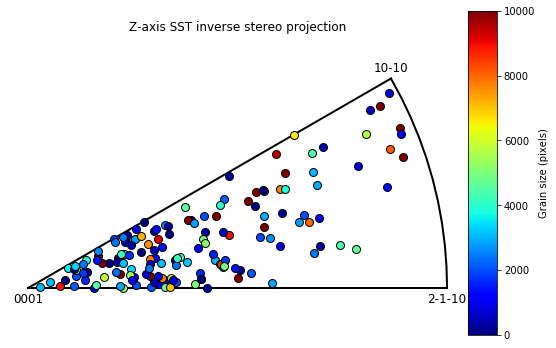

In [9]:
from pymicro.crystal.texture import PoleFigure
from pymicro.crystal.lattice import Lattice

# build a custom pole figure showing the grain size
pf = PoleFigure(microstructure=micro_ebsd, hkl='0001', lattice=Ti7Al)
pf.mksize = 8
pf.set_map_field('size', grains_EBSD[good_grains][:, 9], field_min_level=0.0, field_max_level=10000., lut='jet')
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.9], aspect='equal')
pf.plot_sst(ax=ax1, mk='o')
# to add the color bar
ax2 = fig.add_axes([0.85, 0.05, 0.05, 0.9])
norm = colors.Normalize(vmin=0., vmax=10000.)
cb = colorbar.ColorbarBase(ax2, cmap=cm.jet, norm=norm, orientation='vertical')
cb.set_label('Grain size (pixels)')
plt.show()

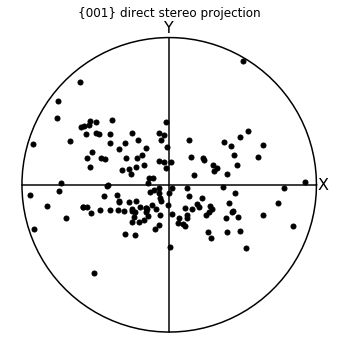

In [10]:
pf = PoleFigure(microstructure=micro_ebsd, lattice=Ti7Al, hkl='001')
pf.mksize = 5
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.9], aspect='equal')
pf.plot_pf(ax=ax1, mk='o')
plt.show()

(401, 201)
3.0


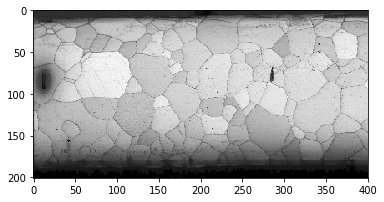

In [11]:
# read the merged ebsd scan data
import h5py
f = h5py.File('EBSD/Ts3_after_def.h5')
nrows = f['Ts3_after_def/EBSD/Header/nRows'][0]
ncols = f['Ts3_after_def/EBSD/Header/nColumns'][0]
scan_step = f['Ts3_after_def/EBSD/Header/Step X'][0]
iq = np.reshape(f['Ts3_after_def/EBSD/Data/IQ'], (nrows, ncols)).T  # [x, y] form with x being the horizontal coordinate
f.close()
print(iq.shape)
print(scan_step)

plt.imshow(iq.T, origin='upper', interpolation='nearest', cmap=plt.cm.gray)

253.219 234.625
[106.414  51.363 350.93 ]
Grain
 * id = 77
 * Crystal Orientation
orientation matrix = [[-0.18462556  0.97506456 -0.12313616]
 [-0.63599407 -0.02301345  0.77135071]
 [ 0.74928295  0.22072492  0.62438415]]
Euler angles (degrees) = ( 106.414,  51.363, 350.930)
Rodrigues vector = [0.3886555  0.61579114 1.13715486]
Quaternion = [ 0.59513552 -0.23130269  0.36647918  0.67676125]
 * position [253.219 234.625   0.   ]
 * has vtk mesh ? False



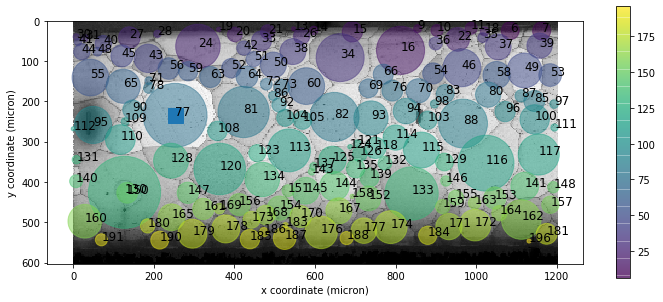

In [12]:
plt.figure(figsize=(12, 5))
plt.imshow(iq.T, origin='upper', interpolation='nearest', cmap=plt.cm.gray,
           extent=(0, scan_step * iq.shape[0], scan_step * iq.shape[1], 0))
plt.scatter(grains_EBSD[good_grains[0], 4], grains_EBSD[good_grains[0], 5], 
            s=0.15*grains_EBSD[good_grains[0], 9], c=grains_EBSD[good_grains[0], 0], alpha=0.5)
for grain in micro_ebsd.grains:
    plt.annotate('%d' % grain.id, xycoords='data', xy=grain.position[:2], color='k', fontsize=12)
N = 76  # index in good grains
plt.plot(grains_EBSD[N, 4], grains_EBSD[N, 5], 's', markersize=15)
plt.colorbar()
plt.xlabel('x coordinate (micron)')
plt.ylabel('y coordinate (micron)')
# look at grain number 77
print(grains_EBSD[76, 4], grains_EBSD[76, 5])
print(grains_EBSD[76, 1:4])
print(micro_ebsd.get_grain(77))

In [13]:
# transformation matrix from A1A2A3 (EBSD) to XYZ (DCT)
T = np.array([[ 0., 0., -1.],
              [-1., 0.,  0.],
              [ 0., 1.,  0.]])

from pymicro.crystal.microstructure import Microstructure, Grain, Orientation

# create the EBSD microstructure using orientation in the DCT coordinate system
micro_ebsd_XYZ = Microstructure(name='ts3_ebsd_XYZ')
for grain in micro_ebsd.grains:
    g_xyz = np.dot(grain.orientation_matrix(), T.T)  # move to XYZ local frame
    o_xyz = Orientation(g_xyz).move_to_FZ(symmetry=Ti7Al._symmetry)
    g = Grain(grain.id, o_xyz)
    g.position = grain.position  # we could change the local frame here too
    g.size = grain.size
    micro_ebsd_XYZ.grains.append(g)

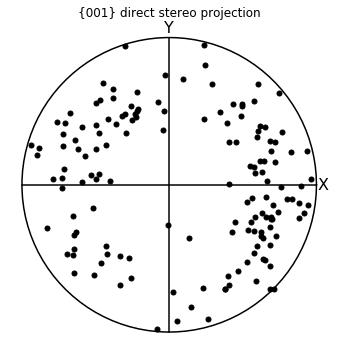

In [14]:
pf = PoleFigure(microstructure=micro_ebsd_XYZ, lattice=Ti7Al, hkl='001')
pf.mksize = 5
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.9], aspect='equal')
pf.plot_pf(ax=ax1, mk='o')
plt.show()

In [191]:
# transformation matrix from A1A2A3 (EBSD) to XYZ (DCT)
T = np.array([[ 0., 0., -1.],
              [-1., 0.,  0.],
              [ 0., 1.,  0.]])

o_tsl = micro_ebsd.get_grain(90).orientation
g_xyz = np.dot(o_tsl.orientation_matrix(), T.T)  # move to XYZ local frame
o_xyz = Orientation(g_xyz).move_to_FZ(symmetry=Ti7Al._symmetry)
o_xyz.rod

array([-0.64021468,  0.39446845, -0.18641101])

In [188]:
dct_fs.load_grain(gid=44)
dct_fs.grain

loading grain from file 4_grains/phase_01/grain_0044.mat


Grain
 * id = 44
 * Crystal Orientation
orientation matrix = [[ 0.54380231 -0.57763661  0.60878157]
 [-0.42680949  0.43423141  0.79326965]
 [-0.72257367 -0.69121562 -0.01040474]]
Euler angles (degrees) = ( 313.729,  90.596,  37.504)
Rodrigues vector = [ 0.75445386 -0.67662921 -0.07665425]
Quaternion = [ 0.70136099 -0.52914451  0.47456134  0.0537623 ]
 * position [-0.28586048 -0.02162732  0.16286273]
 * has vtk mesh ? False

In [124]:
print(micro_ebsd_XYZ.get_grain(77))

# DCT grain 19 (77 in EBSD)
# R vector from DCT is [0.6317, -0.4554, -0.0234]
# position -0.32984752  0.00198187  0.03439262

# DCT grain 66 (81 in EBSD)
# R vector from DCT is [0.4068, 0.6086, -0.2513]
# position -0.34217341 -0.03296191 -0.11182

# DCT grain 78 (120 in EBSD)
# R vector from DCT is [-0.0947, 0.7245, 0.1666]
# position -0.34205544  0.10841131 -0.05677367

# DCT grain 285 (128 in EBSD)
# R vector from DCT is [-0.4149, 0.0107, 0.2291]
# position -0.36031055  0.08732672  0.03817485

# DCT grain 459 (108 in EBSD)
# R vector from DCT is [-0.0166, 0.6331, 0.2082]
# position -0.35578515  0.01986428 -0.0588386 

# DCT grain 44 (109 in EBSD ? -> no just below the surface)
# R vector from DCT is [0.7544, -0.6766, -0.0766]
# position -0.28586048 -0.02162732  0.16286273

# -- 

# DCT grain 1 (130 in EBSD)
# R vector from DCT is [-0.4648, -0.3853, -0.0332]
# position -0.28949663  0.15308176  0.14593637

# DCT grain 54 (81 in EBSD)
# R vector from DCT is [-0.5951, -0.3248, -0.0386]
# position -0.2970026   0.1081537  -0.15249265

# DCT grain 275 (128 in EBSD)
# R vector from DCT is [0.3476, 0.0939, 0.1398]
# position -0.34324318  0.16571487 -0.27740773

# in ts3_dct_bot_
# g11 [-0.4992 0.3006 -0.1949]
# g5 [-0.5206 -0.4000 0.0110]
# g64 [-0.1941 -0.6448 -0.2619]
# g31 [-0.5952 0.4461 -0.1623]
# g54 [-0.8194 -0.4358 0.1643]
# g39 [0.5109 0.2988 -0.2571]

#for ii = 1:100
#    g = load(sprintf('4_grains/phase_01/grain_%04d.mat', ii));
#    g.R_vector
#end

Grain
 * id = 77
 * Crystal Orientation
orientation matrix = [[ 0.72957739 -0.45847425  0.50746251]
 [-0.27903631  0.47788746  0.83292395]
 [-0.62438415 -0.74928295  0.22072492]]
Euler angles (degrees) = ( 320.195,  77.248,  31.352)
Rodrigues vector = [ 0.65159936 -0.46612776 -0.07389782]
Quaternion = [ 0.77913249 -0.50768224  0.36317528  0.05757619]
 * position [496.017 186.559   0.   ]
 * has vtk mesh ? False



Plot slip traces on the surface
--

Crystal Orientation
orientation matrix = [[ 0.72957739 -0.45847425  0.50746251]
 [-0.27903631  0.47788746  0.83292395]
 [-0.62438415 -0.74928295  0.22072492]]
Euler angles (degrees) = ( 320.195,  77.248,  31.352)
Rodrigues vector = [ 0.65159936 -0.46612776 -0.07389782]
Quaternion = [ 0.77913249 -0.50768224  0.36317528  0.05757619]
Crystal Orientation
orientation matrix = [[ 0.79989277  0.57750077 -0.16329241]
 [-0.03842161  0.32080873  0.94636438]
 [ 0.59891179 -0.75071607  0.27880109]]
Euler angles (degrees) = (  38.582,  73.811, 350.210)
Rodrigues vector = [0.70726344 0.31765092 0.25668752]
Quaternion = [ 0.7745164  -0.54778713  0.24602584  0.19880869]


[0, 1200, 600, 0]

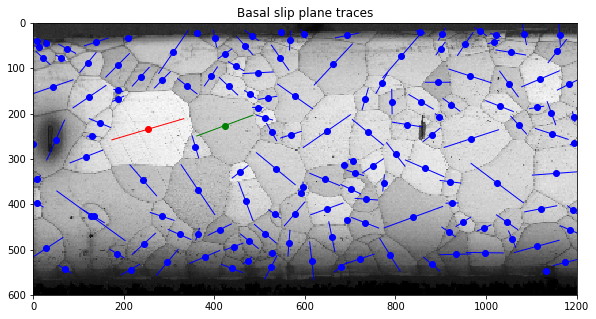

In [136]:
from pymicro.crystal.lattice import Lattice, HklPlane, HklDirection

trace_size = 100  # micron
Ti7Al = Lattice.hexagonal(0.2931, 0.4694)  # nm
p_basal = HklPlane(0, 0, 1, Ti7Al)  # basal plane
n_int = np.array([1, 0, 0])  # since X is going through the sample
view_up = np.array([0, 1, 0])  # here we want a figure with the sample horizontal as in the EBSD

#n_int = np.array([0, 0, -1])  # for orientation data in A1A2A3 (TSL)
#view_up = np.array([1, 0, 0])  # for orientation data in A1A2A3 (TSL)

plt.figure(figsize=(12, 5))
plt.imshow(iq.T, origin='upper', interpolation='nearest', cmap=cm.gray,
           extent=(0, scan_step * iq.shape[0], scan_step * iq.shape[1], 0))

for g in micro_ebsd_XYZ.grains:
    size = g.size
    trace = p_basal.slip_trace(g.orientation, n_int, view_up, trace_size=size, verbose=False)
    if g.id == 77:
        color = 'r'
        print(g.orientation)
    elif g.id == 81:
        color = 'g'
        print(g.orientation)
    else:
        color = 'b'
    x = g.position[0] + np.array([-trace[0] / 2, trace[0] / 2])
    y = g.position[1] + np.array([-trace[1] / 2, trace[1] / 2])
    plt.plot(g.position[0], g.position[1], 'o', color=color)
    plt.plot(x, y, '-', linewidth=1, color=color)
plt.title('Basal slip plane traces')
plt.axis([0, 1200, 600, 0])

In [138]:
from pymicro.crystal.lattice import SlipSystem

'''
PrismaticA
  U   V   T   W | H   K   I   L
  2  -1  -1   0   0   1  -1   0
  1   1  -2   0  -1   1   0   0
  1  -2   1   0  -1   0   1   0
'''


(h, k, l) = HklPlane.four_to_three_indices(0, -1, 1, 0)
(u, v, w) = HklDirection.four_to_three_indices(2, -1, -1, 0)
ss_prism1 = SlipSystem(HklPlane(h, k, l, Ti7Al), HklDirection(u, v, w, Ti7Al))

(h, k, l) = HklPlane.four_to_three_indices(-1, 1, 0, 0)
(u, v, w) = HklDirection.four_to_three_indices(1, 1, -2, 0)
ss_prism2 = SlipSystem(HklPlane(h, k, l, Ti7Al), HklDirection(u, v, w, Ti7Al))

(h, k, l) = HklPlane.four_to_three_indices(-1, 0, 1, 0)
(u, v, w) = HklDirection.four_to_three_indices(1, -2, 1, 0)
ss_prism3 = SlipSystem(HklPlane(h, k, l, Ti7Al), HklDirection(u, v, w, Ti7Al))

ss_prism = [ss_prism1, ss_prism2, ss_prism3]
print(ss_prism1)
print(ss_prism2)
print(ss_prism3)

(0-10)[100]
(-110)[110]
(-100)[010]


(0-10)[100]
0.4226776773465311
(-110)[110]
0.02243959469585903
(-100)[010]
0.40023808265067207


[0, 1200, 600, 0]

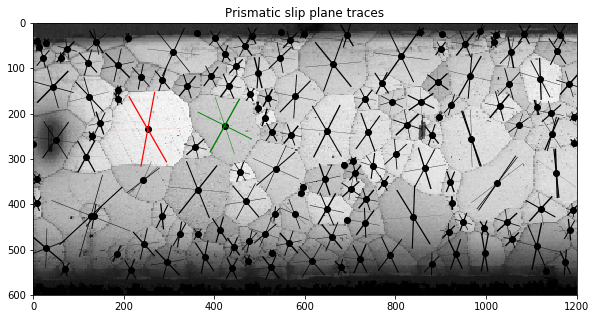

In [274]:
# now try with prismatic planes
import math
import fractions

p_prism1 = HklPlane(0, 1, 0, lattice=Ti7Al)
p_prism2 = HklPlane(-1, 1, 0, lattice=Ti7Al)
p_prism3 = HklPlane(-1, 0, 0, lattice=Ti7Al)
slip_prism = [p_prism1, p_prism2, p_prism3]

n_int = np.array([1, 0, 0])
view_up = np.array([0, 1, 0])

plt.figure(figsize=(12, 5))
plt.imshow(iq.T, origin='upper', interpolation='nearest', cmap=cm.gray,
           extent=(0, scan_step * iq.shape[0], scan_step * iq.shape[1], 0))

for g in micro_ebsd_XYZ.grains:
    size = g.size
    plt.plot(g.position[0], g.position[1], 'ko')
    if g.id == 77:
        color = 'r'
        for ss in ss_prism:
            print(ss)
            print(g.orientation.schmid_factor(ss, load_direction=[0., 0., 1]))
    elif g.id == 81:
        color = 'g'
        #for ss in ss_prism:
        #    print(ss)
        #    print(g.orientation.schmid_factor(ss, load_direction=[0., 0., 1]))
    else:
        color = 'k'

    for ss in ss_prism:
        p = ss.get_slip_plane()
        lw = 3 * g.orientation.schmid_factor(ss, load_direction=[0., 0., 1])
        trace = p.slip_trace(g.orientation, n_int, view_up, trace_size=size, verbose=False)
        x = g.position[0] + np.array([-trace[0] / 2, trace[0] / 2])
        y = g.position[1] + np.array([-trace[1] / 2, trace[1] / 2])
        plt.plot(x, y, '-', linewidth=lw, color=color)
plt.title('Prismatic slip plane traces')
plt.axis([0, 1200, 600, 0])

DCT characterization
==

Two DCT scans to map the gage length: `ts3_dct_top_` and `ts3_dct_bot_`, samtz=1.996 (top) samtz=2.496 (bot). Plus another scan `ts3_dct_hr1_` done with the PCO edge camera (smaller field of view but higher resolution).

| scan | samtx | samty | samtz | nfdtx |
| --- | --- | --- | --- | --- |
| ts3_dct_top_ | 0.6 | 0.025 | 1.9963 | 45.8055 |
| ts3_dct_bot_ | 0.6 | 0.025 | 2.49642 |45.8055 |
| ts3_dct_hr1_ | 0.6 | 0.025 | 1.9963 | 100.2 |

NB: `5_reconstruction/phase_01_vol.mat` volume correspond to `5_reconstruction/archive/phase_01_vol_2018-05-05_16-20-41.mat` at ESRF.

In [156]:
exp = Experiment.load('ts3_experiment.txt')
Ti7Al = exp.get_sample().get_material()
grain_ids = exp.get_sample().get_grain_ids()
print(grain_ids[199, 349, 99])
print(grain_ids[99, 349, 199])

loading grain_ids field from id11/ts3_/ts3_dct_top_/5_reconstruction/phase_01_vol.mat
successfully loaded grain_ids with shape (420, 715, 715)
27
19


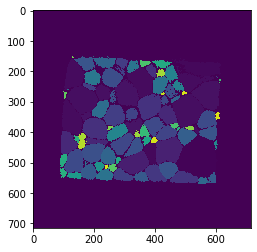

In [157]:
plt.imshow(grain_ids[:, :, 199].T)
plt.show()

volume ts3_dct_top_

* grain  4 center of mass: (493, 234, 109)
* grain 13 center of mass: (373, 458, 143)
* grain 15 center of mass: (333, 222, 159)
* grain 19 center of mass: (140, 352, 136)
* grain 20 center of mass: (516, 374, 137)

In [147]:
voxel_size = 0.0014
for label in [19, 66, 78, 285]:  #4, 5, 13, 15, 19, 20, 24, 25, 34, 45, 57, 59, 61, 67, 79, 95, 96, 103, 129, 141, 145, 177, 204, 373, 493]:  # ts3_dct_top_
    array_bin = (grain_ids == label).astype(np.uint8)
    local_com = ndimage.measurements.center_of_mass(array_bin, grain_ids)
    com_mm = voxel_size * (local_com - 0.5 * np.array(grain_ids.shape))
    print('grain %2d position: %6.3f, %6.3f, %6.3f' % (label, com_mm[0], com_mm[1], com_mm[2]))

grain 19 position: -0.329, -0.001,  0.041
grain 66 position: -0.342, -0.029, -0.109
grain 78 position: -0.344,  0.108, -0.053
grain 285 position: -0.360,  0.087,  0.042


In [158]:
from scipy import ndimage
# rotate the sample by 3 degrees and crop empty space around it
data = ndimage.rotate(grain_ids, angle=-2.5, order=0, reshape=False)[80:620, 155:575, :]
#data = ndimage.rotate(grain_ids, angle=-2.5, order=0, reshape=False)[60:600, 130:550, :] for ts3_dct_old
print(data.shape)

(540, 420, 420)


In [159]:
from pymicro.file.file_utils import HST_write
HST_write(data[::2, ::2, ::2], 'ts3_top_.raw')

opening ts3_top_.raw for writing in mode w
volume size is 270x210x210
data type is int16
writing .info file
done with writing


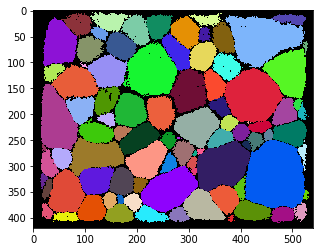

In [160]:
from pymicro.crystal.microstructure import Microstructure

slice = data[:, :, 210]
rand_cmap = Microstructure.rand_cmap(N=slice.max(), first_is_black=True)
plt.imshow(slice.T, interpolation='nearest', cmap=rand_cmap);plt.show()

In [161]:
# build the front slice
front_slice = np.zeros((420, 420))
for i in range(30):
    w = np.where(front_slice == 0)
    front_slice[w] = data[i, :, :][w]

In [162]:
gids = np.unique(front_slice)
print(gids)
print(len(gids))
centers = np.zeros((len(gids) - 2, 2))
i = 0
print(' gid | center (x, y)\n' + 20 * '-')
for gid in gids[2:]:  # skipping labels -1 and 0
    # compute the center of mass of each grain in this image
    centers[i] = ndimage.measurements.center_of_mass(front_slice == gid, front_slice)
    if gid < 30:
        print('%4d | (%d, %d)' % (gid, int(centers[i, 0]), int(centers[i, 1])))
    i += 1
# move a bit the center of grain 1
centers[0][0] -= 25
centers[0][1] += 25

[ -1.   0.   1.  12.  19.  20.  24.  27.  40.  44.  54.  55.  66.  68.
  78. 105. 107. 113. 138. 144. 149. 151. 177. 195. 206. 233. 238. 248.
 251. 253. 275. 278. 285. 294. 299. 306. 318. 343. 344. 358. 378. 388.
 389. 403. 407. 411. 415. 420. 424. 432. 433. 435. 449. 450. 451. 459.
 473. 475. 482. 490. 491. 513. 514. 515. 518. 528. 533. 535. 550. 552.
 554. 561. 580. 583. 585. 598. 600. 607. 612. 621. 627. 633. 642. 644.
 645. 652. 656. 659. 660. 665.]
90
 gid | center (x, y)
--------------------
   1 | (320, 325)
  12 | (357, 65)
  19 | (200, 243)
  20 | (68, 211)
  24 | (147, 174)
  27 | (245, 136)


665.0


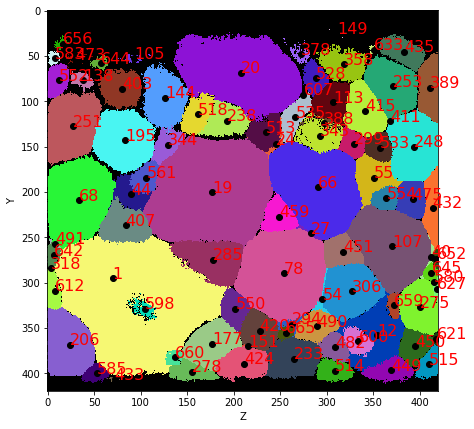

In [166]:
from matplotlib import pyplot as plt, cm
from pymicro.crystal.microstructure import Microstructure
%matplotlib inline

print(front_slice.max())
rand_cmap = Microstructure.rand_cmap(N=int(front_slice.max()), first_is_black=True)
#print(rand_cmap.colors[0])
#print(rand_cmap.colors[1])
plt.figure(figsize=(7, 7))
plt.imshow(front_slice[:, ::-1], interpolation='nearest', cmap=rand_cmap)
for i in range(centers.shape[0]):
    #print(i, gids[i + 2])
    plt.plot(420 - centers[i, 1], centers[i, 0], 'ko')
    plt.annotate('%d' % gids[i + 2], xycoords='data', xy=(420 - centers[i, 1], centers[i, 0]), color='r', fontsize=16)
plt.ylabel('Y')
plt.xlabel('Z')
plt.axis('tight')
plt.show()

In [ ]:
grains = show_grains(grain_ids)
box = box_3d(size=dims)
axes = axes_actor(50, axisLabels=('X', 'Y', 'Z'), fontSize=50)
s3d = Scene3D(display=True, ren_size=(800, 800), name='ts3_dct_top')
s3d.add(grains)
s3d.add(box)
s3d.add(axes)
cam = setup_camera(size=dims)
cam.SetFocalPoint(0.5 * dims)
cam.SetViewUp(0, 1, 0)
cam.SetPosition(-2 * dims[0], 0.5 * dims[0], 0.5 * dims[2])
s3d.set_camera(cam)
im = s3d.get_frame()
Image(im)

## DCT calculations

matlab code to extract miller indices for indexed reflections:
```
for i =1:56
  disp(sprintf('%2d - (%d, %d, %d, %d),', i, g.allblobs(1).hklsp(g.proj.ondet(g.proj.included(i)), :)))
end
```

In [26]:
import os, h5py
from pymicro.crystal.microstructure import Grain, Orientation
from pymicro.crystal.lattice import HklPlane

gid = 8
data_dir = os.path.join('id11', 'ts3_', 'ts3_dct_top_')
with h5py.File(os.path.join(data_dir, '4_grains/phase_01/grain_%04d.mat' % gid)) as gmat:
    g = Grain(gid, Orientation.from_rodrigues(gmat['R_vector'][()]))
    g.om_exp = gmat['om_exp'][0, :]
    g.uv_exp = gmat['uv_exp'][:, :]
    g.center = gmat['center'][:, 0]
    g.position = gmat['center'][:, 0]
    try:
        ref_included = gmat['proj/included'][0][0]
        g.included = gmat[ref_included][0, :]
        ref_ondet = gmat['proj/ondet'][0][0]
        g.ondet = gmat[ref_ondet][0, :]
        # grab the projection stack
        ref_stack = gmat['proj']['stack'][0][0]
        g.stack_exp = gmat[ref_stack][()].transpose(1, 2, 0)  # now in [ndx, u, v] form
        g.hklsp = gmat['allblobs/hklsp'][:, :]
    except AttributeError:
        # classic file organization
        g.included = gmat['proj/included'][0, :]
        g.ondet = gmat['proj/ondet'][0, :]
        g.stack_exp = gmat['proj/stack'][()].transpose(1, 2, 0)  # now in [ndx, u, v] form
        # for this data set, we have to hack around the DCT + TT work in progress
        ref_hklsp = gmat['allblobs/hklsp'][()][0][0]
        g.hklsp = gmat[ref_hklsp][:, :]
print(g.stack_exp.shape)

ndx = 2  # look at this projection (grain 8)
#ndx = 9  # look at this projection (grain 4)

h, k, i, l = g.hklsp[:, int(g.ondet[int(g.included[ndx] - 1)] - 1)]  # taking care of matlab indices starting at 1
print('diffracting plane is (%d, %d, %d, %d)'% (h, k, i, l))
print('omega exp is %.2f' % g.om_exp[ndx])
(h, k, l) = HklPlane.four_to_three_indices(h, k, i, l)
print(h, k, l)
hkl_dif = HklPlane(h, k, l, Ti7Al)

(56, 352, 301)
diffracting plane is (0, 1, -1, 0)
omega exp is 45.49
0.0 1.0 0.0


In [27]:
for i in range(g.stack_exp.shape[0]):
    ii = int(g.ondet[int(g.included[i] - 1)] - 1)
    print('{} - {:6.2f}'.format(g.hklsp[:, ii], g.om_exp[i]))

[-0. -1.  1. -0.] -  27.26
[ 0.  1. -1.  0.] - 207.26
[ 0.  1. -1.  0.] -  45.49
[ 1. -1.  0.  0.] - 248.55
[ 1. -1.  0.  0.] -  80.13
[-1.  0.  1.  0.] -  56.00
[ 1. -0. -1. -0.] - 236.00
[ 1. -0. -1. -0.] -  63.46
[-1.  0.  1.  0.] - 243.46
[0. 0. 0. 2.] - 327.21
[ 0.  1. -1. -1.] -   4.89
[ 0.  1. -1.  1.] - 276.56
[ 0.  1. -1.  1.] - 115.11
[-1.  1. -0.  1.] -  22.69
[ 1. -1.  0. -1.] -  35.73
[-1.  1. -0.  1.] - 215.73
[ 1. -1.  0.  1.] - 283.57
[-1.  0.  1.  1.] -  27.56
[ 1. -0. -1. -1.] - 207.56
[ 1. -0. -1. -1.] -  35.96
[-1.  0.  1.  1.] - 215.96
[-0. -1.  1.  2.] - 174.08
[ 0.  1. -1. -2.] - 354.08
[ 0.  1. -1. -2.] - 161.62
[-0. -1.  1.  2.] - 341.62
[-0. -1.  1. -2.] - 120.63
[ 0.  1. -1.  2.] - 300.63
[ 0.  1. -1.  2.] - 137.26
[-0. -1.  1. -2.] - 317.26
[ 1. -1.  0. -2.] -  12.47
[ 1. -1.  0. -2.] - 178.00
[-1.  1. -0.  2.] - 358.00
[-1.  1. -0. -2.] - 118.22
[ 1. -1.  0.  2.] - 298.22
[ 1. -1.  0.  2.] - 130.03
[-1.  1. -0. -2.] - 310.03
[ 1. -0. -1. -2.] - 187.97
[ 1. 

In [28]:
# predict both omega angles for this plane
w1, w2 = g.dct_omega_angles(hkl_dif, lambda_keV, verbose=True)

# chose the omega closest to the experimental value
omega = w1 if abs(w1 - g.om_exp[ndx]) < abs(w2 - g.om_exp[ndx]) else w2
print('%.2f value was chosen as it is closer to the experimental value of %.2f' % (omega, g.om_exp[ndx]))

# predict omega and position on detector
omegar = omega * np.pi / 180
R = np.array([[np.cos(omegar), -np.sin(omegar), 0], [np.sin(omegar), np.cos(omegar), 0], [0, 0, 1]])
g_pos_rot = np.dot(R, g.center)
print(g_pos_rot)

X = np.array([1., 0., 0.]) / lambda_nm
gt = g.orientation_matrix().transpose()
G = np.dot(R, np.dot(gt, hkl_dif.scattering_vector()))
print(G)
K = X + G
pg = detector.project_along_direction(K, g_pos_rot)
print(pg)
(up, vp) = detector.lab_to_pixel(pg)[0]
print('spot located in image full%04d.edf at position (%d, %d) -- prediction is (%d, %d)' % 
      (int(g.om_exp[ndx] / 0.1), g.uv_exp[0, ndx], g.uv_exp[1, ndx], up, vp))


Bragg angle for 010 at 38.0 keV is 3.7 deg

A=0.948, B=-1.287, C=-0.253, Delta=10.0
the two omega values in degrees fulfilling the Bragg condition are (207.3, 45.5)
45.49 value was chosen as it is closer to the experimental value of 45.49
[-0.05512781 -0.14675736  0.12680167]
[-0.25318918  1.5788538   3.60050908]
[6.50664918 0.19406954 0.90404295]
spot located in image full0454.edf at position (1155, 374) -- prediction is (1155, 378)


In [33]:
from matplotlib import pyplot as plt, cm
from pymicro.crystal.microstructure import Microstructure
%matplotlib inline

from scipy import ndimage
# binarize this grain
grain_data = np.where(grain_ids == gid, 1, 0)
data_dif = grain_data[ndimage.find_objects(grain_ids == gid)[0]]  # (X, Y, Z) coordinate system
print(data_dif.shape)
# now we have the grain in 3D, add the surface VTK mesh
g.add_vtk_mesh(gid * grain_data, contour=False, verbose=False)
#g.save_vtk_repr()
print('done')

(162, 144, 144)
done


(162, 144, 144)
(1, 352, 301)


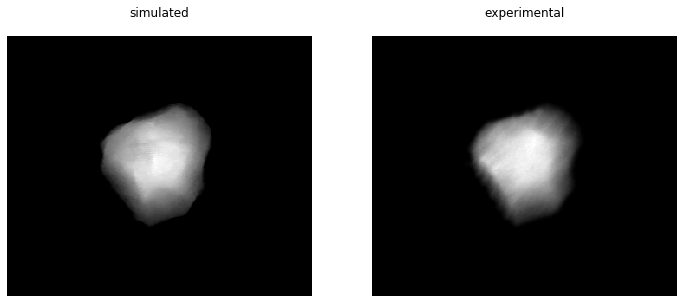

In [34]:
from pymicro.xray.xray_utils import radiographs

proj_dif_sim = radiographs(data_dif, [omega])  # (Y, Z) coordinate system
proj_dif_sim = proj_dif_sim.transpose(2, 0, 1)[:, :, ::-1]  # (u, v) axes correspond to (Y, -Z) for DCT detector
padding = np.array(g.stack_exp[ndx].shape) - np.array(proj_dif_sim.shape[1:])
p, q = padding // 2
proj_dif_sim = np.pad(proj_dif_sim, ((0, 0), (p, padding[0] - p), (q, padding[1] - q)), 'constant')
print(data_dif.shape)
print(proj_dif_sim.shape)
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax1.matshow(proj_dif_sim[0].T, cmap=cm.gray)
ax1.set_title('simulated')
plt.axis('off')
ax2 = fig.add_subplot(122)
ax2.matshow(g.stack_exp[ndx].T, cmap=cm.gray)
ax2.set_title('experimental')
plt.axis('off')
plt.show()

## Topotomography

In [207]:
1350/90

15.0

grain ids used during beamtime (index from 04/05/2018): [5 11 13 15 17 19 21 31 32 39 54 64 201 269]

grains in `ts3_dct_top_` with TT:

| old gid |  11 | 13 | 17new | 19 | 21new | 64 |  31 |   5 | 54_r1 | 54_r2 |  39 | 61_r1 | 61_r2 | 201 | 219new |
| --- | --- | --- | --- | --- | ---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| diffry | -5.99 | -7.14 | -6.68 | -5.78 | -5.59 | -6.15 | -5.84 | -5.79 | -7.14 | -5.99 | -5.69 | -4.19 | -7.65 | -7.14 | -3.89 | 
| samtz |  1.895 | 2.0254 | 1.954 | 2.003 | 1.942 | 2.035 | 1.912 | 1.860 | 2.187 | 2.05778 | 1.805 | 2.10 | 2.10 | 1.94 | 1.966 |
| samrx | -6.255 | 16.765 | 6.157 | -4.376 | -16.645 | 15.866 | -6.306 | 11.341 | -18.671 | 9.112 | 4.379 | -14.381 | -6.101 | -3.95 | -17.342 |
| samry | -13.222 | -7.430 | 1.832 | -12.474 | 13.106 | 7.879 | -11.071 | -4.448 | 14.166 | -2.261 | -4.268 | 1.632 | -8.804 | 0.603 | 14.017 | 
| new gid | 19 | 14 | 20 | 24 | 26 | 78 | 33 | 8 | 67 | 67 | 44 | 66 | 66 | 430 | 285 |
| reflection | (11-20) | (11-2-2) | (-2112) | (11-20) | (-2110) | (-2110) | (11-20) | (1-210) | (-2112) | (-2110) | (11-20) | (-1101) | (-2201) | (11-22) | (0-111) |
| location | surface | volume | surface | volume | volume | surface | volume | volume | volume | volume | volume | surface | surface | volume | surface |

The grain ids have changed due to the new indexing, for instance grain 5 is now grain 8.

grain 5:

```
calc_pole_tilts_id11_index(parameters, 5, [1 2 3 4 5 6 7 8])

Grain 5:  Found -1  2 -1  0 reflection:  diffry = 6.395715 samrx = 11.273800   samry = -4.437606
Positions in DCT scan: omega = 83.968293 (diffrz = 173.968293), u = 694.982977 v = -93.612812

Detector positions for 16.430000 mm distance: mv nfdtx 112.200000, d3tz 3.730220
mv diffry -6.395715 samrx 11.273800 samry -4.437606 samtx 0.664345 samty -0.114146 samtz 1.867140
```

NB: grain 5 tt0 (nfdtx = 107.2) - tt1 (nfdtx = 112.2) - tt2 (nfdtx = 117.2) - tt3 (nfdtx = 122.2)

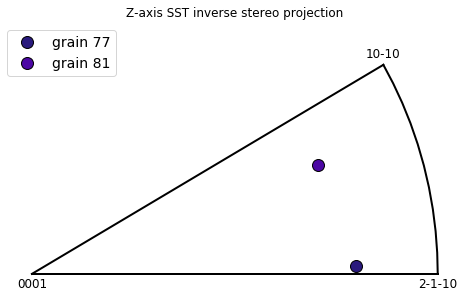

In [59]:
# create a pole figure for grains 19 and 66
from pymicro.crystal.texture import PoleFigure

selected_grains = [micro_ebsd_XYZ.get_grain(77), micro_ebsd_XYZ.get_grain(81)]
micro_selected_grains = Microstructure(name='grains 77 and 81')
micro_selected_grains.grains = selected_grains

# build a custom pole figure showing the grain size
pf = PoleFigure(microstructure=micro_selected_grains, hkl='0001', lattice=Ti7Al)
pf.set_map_field('grain_id')
pf.pflegend = True # this works well for a few grains
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(1, 1, 1)
pf.plot_sst(ax=ax1, mk='o')
ax1.legend(bbox_to_anchor=(0.25, 1), loc=1, numpoints=1, prop={'size': 14})
plt.show()

In [84]:
# verify TT alignment for a few grains

from pymicro.crystal.lattice import Lattice, HklPlane
from pymicro.crystal.microstructure import Microstructure, Grain, Orientation
from pymicro.xray.experiment import Experiment
import numpy as np

# experimental setup
exp = Experiment.load('ts3_experiment.txt')
Ti7Al = exp.get_sample().get_material()
lambda_keV = exp.get_source().max_energy
samrx_offset = -1.2
samry_offset = 0.7
omega_offset = 90
gid = 19
g = exp.get_sample().get_microstructure().get_grain(gid)

# compute the instrument transformation matrix
angle_zr = np.radians(omega_offset)
angle_yr = np.radians(samry_offset)
angle_xr = np.radians(samrx_offset)
Rz = np.array([[np.cos(angle_zr), -np.sin(angle_zr), 0], [np.sin(angle_zr), np.cos(angle_zr), 0], [0, 0, 1]])
Ry = np.array([[np.cos(angle_yr), 0, np.sin(angle_yr)], [0, 1, 0], [-np.sin(angle_yr), 0, np.cos(angle_yr)]])
Rx = np.array([[1, 0, 0], [0, np.cos(angle_xr), -np.sin(angle_xr)], [0, np.sin(angle_xr), np.cos(angle_xr)]])
T = Rz.dot(np.dot(Ry, Rx))
T = Orientation.compute_instrument_transformation_matrix(samrx_offset, samry_offset, omega_offset)
print(T)

# define our lattice plane for topotomography
(h, k, l) = HklPlane.four_to_three_indices(-1, 2, -1, 0)  # grain 8
(h, k, l) = HklPlane.four_to_three_indices(1, 1, -2, 0)  # grain 19
print(h, k, l)
hkl_tt = HklPlane(h, k, l, Ti7Al)
theta = hkl_tt.bragg_angle(lambda_keV, verbose=True)

# scattering vector
print('grain orientation (rodrigues): %s' % str(g.orientation.rod))
gt = g.orientation_matrix().transpose()
Gs = np.dot(gt, hkl_tt.scattering_vector())
print('scattering vector: %s with norm %.3f' % (str(Gs), np.linalg.norm(Gs)))
print(Gs / np.linalg.norm(Gs))
(h, k, l) = hkl_tt.miller_indices()
print('(%d%d%d) lattice spacing is %.3f nm' % (h, k, l, 1 / hkl_tt.interplanar_spacing()))

# because of the omega offset of -90 (omega = 0 <-> diffrz = -90), the vector Gs needs to be modified
Gs = np.dot(T.T, Gs)
ut = np.arctan(Gs[1] / Gs[2])
lt = np.arctan(-Gs[0] / (Gs[1] * np.sin(ut) + Gs[2] * np.cos(ut)))
print('up tilt (samrx) should be %.3f' % (ut * 180 / np.pi))
print('low tilt (samry) should be %.3f' % (lt * 180 / np.pi))

# pymicro calculation
(ut, lt) = g.orientation.topotomo_tilts(hkl_tt, T, verbose=True)

# compute the S and T tilt matrices
from math import cos, sin, pi
U = np.array([[1, 0, 0], [0, cos(ut), -sin(ut)], [0, sin(ut), cos(ut)]])
L = np.array([[cos(lt), 0, sin(lt)], [0, 1, 0], [-sin(lt), 0, cos(lt)]])
S = np.dot(L, U)
print('tilt matrix S:')
print(S)
BT = np.array([[cos(-theta), 0, sin(-theta)], [0, 1, 0], [-sin(-theta), 0, cos(-theta)]])  # base tilt
Gt = np.dot(S, Gs)
Gl = np.dot(BT, Gt)
print('scattering vector tilted by samrx and samry: Gt = %s with norm %.3f' % (Gt, np.linalg.norm(Gt)))
print('scattering vector further tilted bt base tilt Gl = %s' % Gl)

[[ 6.12277702e-17 -9.99780683e-01 -2.09424199e-02]
 [ 9.99925370e-01 -2.55853561e-04  1.22143214e-02]
 [-1.22170008e-02 -2.09408569e-02  9.99706070e-01]]
1 1 0

Bragg angle for 110 at 38.0 keV is 6.4 deg

grain orientation (rodrigues): [ 0.6317 -0.4555 -0.0235]
scattering vector: [0.58522359 1.64917025 6.59540749] with norm 6.824
[0.08576452 0.2416859  0.96655697]
(110) lattice spacing is 6.824 nm
up tilt (samrx) should be -6.256
low tilt (samry) should be -13.289
up tilt (samrx) should be -6.256
low tilt (samry) should be -13.289
tilt matrix S:
[[ 0.97322384  0.02504681 -0.22849074]
 [ 0.          0.9940455   0.10896576]
 [ 0.22985944 -0.10604807  0.96742878]]
scattering vector tilted by samrx and samry: Gt = [0.         0.         6.82360969] with norm 6.824
scattering vector further tilted bt base tilt Gl = [-0.75956754  0.          6.78120243]


In [88]:
# TT calculations for scans ts3_dct_top_grain0061_ttpar_1 (4.19 deg -> [0, 1, -1, 1]) and 2 (7.65 deg -> [0, 2, -2, 1])
g = exp.get_sample().get_microstructure().get_grain(66)

for hkl_family in [(0, 1, 1), (0, 2, 1)]:
    family = HklPlane.get_family(hkl_family, lattice=Ti7Al, crystal_structure=Symmetry.hexagonal)
    # verify topotomo alignment
    for hkl in family:
        h, k, l = hkl.miller_indices()
        i = -(h + k)
        (ut, lt) = np.degrees(g.orientation.topotomo_tilts(hkl, T, verbose=False))
        if abs(ut) < 20 and abs(lt) < 15:
            print('* old grain %d is now grain %d' % (61, g.id))
            print('aligned reflection will be (%d%d%d%d)' % (h, k, i, l))
            print('up tilt (samrx) should be %.3f' % ut)
            print('low tilt (samry) should be %.3f' % lt)

* old grain 61 is now grain 66
aligned reflection will be (-1101)
up tilt (samrx) should be -14.333
low tilt (samry) should be 1.567
* old grain 61 is now grain 66
aligned reflection will be (-2201)
up tilt (samrx) should be -6.072
low tilt (samry) should be -8.845


In [115]:
# try to find the grain id in the new numbering 

# list of available families
hkl_family_list = [(  0,   1,   0),
    (  0,   0,   2),
    (  0,   1,   1),
    (  0,   1,   2),
    ( -1,   2,   0),
    (  0,   1,   3),
    (  0,   2,   0),
    ( -1,   2,   2),
    (  0,   2,   1),
    (  0,   0,   4)]

# find the new grain ids
gids_old = [5, 11, 13, 17, 19, 21, 31, 61, 64, 39, 54, 54, 201, 219]
uts_exp = [11.341, -6.255, 16.765, 6.157, -4.376, -16.645, -6.306, -14.381, 15.866, 4.379, -18.671, 9.112, -6.101, -17.342]
lts_exp = [-4.448, -13.222, -7.430, 1.832, -12.474, 13.106, -11.071, 1.632, 7.879, -4.268, 14.166, -2.261, 0.603, 14.017]
gids_new = np.zeros_like(gids_old)

'''
# with ts3_dct_bot TT
gids_old = [23, 24, 30, 34, 34]
diffry = [-6.75, -6.74, -6.75, -4.19, -7.55]
samtz = [2.621, 2.553, 2.644, 2.089, 2.089]
uts_exp = [-5.894, 12.801, -6.904, 11.042, -12.369]
lts_exp = [-14.200, 0.819, 4.787, -13.085, -1.162]
'''
for index in range(len(gids_old)):
    gid_old = gids_old[index]
    ut_exp = uts_exp[index]
    lt_exp = lts_exp[index]

    gid = gid_old
    found = False
    while not found and gid < 678:
        g = exp.get_sample().get_microstructure().get_grain(gid)
        orientation = g.orientation
        #orientation = Orientation.from_rodrigues([0.7514, 0.3530, 0.0622])  # 5 in index from 04/05/2018
        #orientation = Orientation.from_rodrigues([0.7055, -0.3749, 0.0440])  # 31 in index from 04/05/2018
        #orientation = Orientation.from_rodrigues([0.2589, 0.8220, -0.2608])  # 54 in index from 04/05/2018
        #orientation = Orientation.from_rodrigues([-0.0947, 0.7246, 0.1667])  # 64 in index from 04/05/2018
        for hkl_family in hkl_family_list:
            #print('* grain %d, family {%d, %d, %d}' % (g.id, *hkl_family))
            family = HklPlane.get_family(hkl_family, lattice=Ti7Al, crystal_structure=Symmetry.hexagonal)
            # verify topotomo alignment
            for hkl in family:
                h, k, l = hkl.miller_indices()
                i = -(h + k)
                (ut, lt) = np.degrees(orientation.topotomo_tilts(hkl, T, verbose=False))
                if abs(ut - ut_exp) < 0.5 and abs(lt - lt_exp) < 0.5:
                    gids_new[index] = g.id
                    print('* old grain %d is now grain %d' % (gid_old, g.id))
                    print('aligned reflection will be (%d%d%d%d)' % (h, k, i, l))
                    print('up tilt (samrx) should be %.3f' % ut)
                    print('low tilt (samry) should be %.3f' % lt)
                    found = True
        gid += 1
print(gids_new)

* old grain 5 is now grain 8
aligned reflection will be (1-210)
up tilt (samrx) should be 11.282
low tilt (samry) should be -4.439
* old grain 11 is now grain 19
aligned reflection will be (11-20)
up tilt (samrx) should be -6.256
low tilt (samry) should be -13.289
* old grain 13 is now grain 14
aligned reflection will be (11-2-2)
up tilt (samrx) should be 16.781
low tilt (samry) should be -7.329
* old grain 19 is now grain 24
aligned reflection will be (11-20)
up tilt (samrx) should be -4.568
low tilt (samry) should be -12.569
* old grain 21 is now grain 26
aligned reflection will be (-2110)
up tilt (samrx) should be -16.565
low tilt (samry) should be 12.996
* old grain 31 is now grain 33
aligned reflection will be (11-20)
up tilt (samrx) should be -6.260
low tilt (samry) should be -11.129
* old grain 61 is now grain 66
aligned reflection will be (-1101)
up tilt (samrx) should be -14.333
low tilt (samry) should be 1.567
* old grain 64 is now grain 78
aligned reflection will be (-2110)


In [50]:
import os
center_path = os.path.join(exp.get_sample().data_dir, '4_grains/phase_01/grain_centers.txt')
centers = np.genfromtxt(center_path, delimiter=',')
print(centers.shape)
print(centers[0])

(677, 3)
[-0.2895  0.1531  0.1459]


In [72]:
# grain matching between two datasets
import os

# build microstructure 1
rod_path = os.path.join(exp.get_sample().data_dir, '4_grains/phase_01/R_vectors.txt')
orientations = Orientation.read_orientations(rod_path, data_type='rodrigues')
center_path = os.path.join(exp.get_sample().data_dir, '4_grains/phase_01/grain_centers.txt')
centers = np.genfromtxt(center_path, delimiter=',')
micro1 = Microstructure(name='ts3_dct_top_last_')
for i in range(len(orientations)):
    gid = i + 1
    g = Grain(gid, orientations[gid])
    g.position = centers[i]
    g.center = centers[i]
    micro1.grains.append(g)
print(micro1.get_grain(8))

# build microstructure 2
rod_path = os.path.join(exp.get_sample().data_dir, '4_grains/phase_01/2018-05-04/R_vectors.txt')
orientations = Orientation.read_orientations(rod_path, data_type='rodrigues', delimiter=',')
center_path = os.path.join(exp.get_sample().data_dir, '4_grains/phase_01/2018-05-04/grain_centers.txt')
centers = np.genfromtxt(center_path, delimiter=',')
micro2 = Microstructure(name='ts3_dct_top_old_')
for i in range(len(orientations)):
    gid = i + 1
    g = Grain(gid, orientations[gid])
    g.position = centers[i]
    g.center = centers[i]
    micro2.grains.append(g)
print(micro2.get_grain(5))

# build microstructure 3
rod_path = os.path.join(exp.get_sample().data_dir, '4_grains/phase_01/2018-05-05/R_vectors.txt')
orientations = Orientation.read_orientations(rod_path, data_type='rodrigues', delimiter=',')
center_path = os.path.join(exp.get_sample().data_dir, '4_grains/phase_01/2018-05-05/grain_centers.txt')
centers = np.genfromtxt(center_path, delimiter=',')
micro3 = Microstructure(name='ts3_dct_top_new_')
for i in range(len(orientations)):
    gid = i + 1
    g = Grain(gid, orientations[gid])
    g.position = centers[i]
    g.center = centers[i]
    micro3.grains.append(g)
print(micro3.get_grain(5))

Grain
 * id = 8
 * Crystal Orientation
orientation matrix = [[ 0.8479081   0.38742887 -0.36187116]
 [ 0.24072915  0.32678767  0.91392521]
 [ 0.47233604 -0.86203752  0.18382049]]
Euler angles (degrees) = (  28.720,  79.408, 338.399)
Rodrigues vector = [0.753  0.3537 0.0622]
Quaternion = [ 0.76787308 -0.57820843  0.27159671  0.04776171]
 * position [-0.1433 -0.0636  0.1268]
 * has vtk mesh ? False

Grain
 * id = 5
 * Crystal Orientation
orientation matrix = [[ 0.8482318   0.38680303 -0.36178203]
 [ 0.2398519   0.32847725  0.91355009]
 [ 0.47220111 -0.86167634  0.18584941]]
Euler angles (degrees) = (  28.723,  79.289, 338.396)
Rodrigues vector = [0.7514 0.353  0.0622]
Quaternion = [ 0.76853082 -0.57747405  0.27129138  0.04780262]
 * position [-0.1435 -0.0608  0.1306]
 * has vtk mesh ? False

Grain
 * id = 5
 * Crystal Orientation
orientation matrix = [[ 0.84793514  0.38732109 -0.36192315]
 [ 0.24086917  0.32667958  0.91392697]
 [ 0.47221609 -0.86212692  0.18370939]]
Euler angles (degrees)

In [80]:
# find new grain ids from the first indexing
gids_old = [5, 11, 13, 19, 31, 39, 54, 64, 201]
for gid in gids_old:
    o_old = micro2.get_grain(gid).orientation
    mis_tol = 0.5  # angle tolerance, degree
    xyz_tol = 0.05  # 
    candidates = []
    center = micro2.get_grain(gid).center

    for g in micro1.grains:
        # compute misorientation
        mis, _, _ = o_old.disorientation(g.orientation, crystal_structure=Ti7Al.get_symmetry())
        dist_centers = np.sqrt(np.sum((center - g.center) ** 2))
        misd = np.degrees(mis)
        if misd < mis_tol:
            print('grain %3d -- candidate: %3d, misorientation: %.2f deg, dist centers: %.4f mm' % (gid, g.id, misd, dist_centers))

grain   5 -- candidate: 8, misorientation: 0.12 deg, dist centers: 0.0047 mm
grain  11 -- candidate: 19, misorientation: 0.02 deg, dist centers: 0.0004 mm
grain  13 -- candidate: 20, misorientation: 0.06 deg, dist centers: 0.0085 mm
grain  19 -- candidate: 24, misorientation: 0.23 deg, dist centers: 0.0030 mm
grain  31 -- candidate: 33, misorientation: 0.07 deg, dist centers: 0.0009 mm
grain  39 -- candidate: 44, misorientation: 0.06 deg, dist centers: 0.0020 mm
grain  54 -- candidate: 67, misorientation: 0.02 deg, dist centers: 0.0008 mm
grain  64 -- candidate: 78, misorientation: 0.01 deg, dist centers: 0.0012 mm
grain 201 -- candidate: 238, misorientation: 0.04 deg, dist centers: 0.0009 mm


In [130]:
# find new grain ids from the second indexing
#gids_old = [17, 21, 23, 32, 269]
#gids_new2 = np.zeros_like(gids_old)
gids_old = [4, 5, 13, 15, 19, 20, 24, 25, 34, 45, 57, 59, 61, 67, 79, 95, 96, 103, 129, 141, 145, 177, 204, 373, 493]
gids_new3 = np.zeros_like(gids_old)
for i, gid in enumerate(gids_old):
    o_old = micro3.get_grain(gid).orientation
    mis_tol = 0.5  # angle tolerance, degree
    xyz_tol = 0.05  # 
    candidates = []
    center = micro3.get_grain(gid).center

    for g in micro1.grains:
        # compute misorientation
        mis, _, _ = o_old.disorientation(g.orientation, crystal_structure=Ti7Al.get_symmetry())
        dist_centers = np.sqrt(np.sum((center - g.center) ** 2))
        misd = np.degrees(mis)
        if misd < mis_tol:
            print('grain %3d -- candidate: %3d, misorientation: %.2f deg, dist centers: %.4f mm' % (gid, g.id, misd, dist_centers))
            gids_new3[i] = g.id

grain   4 -- candidate:   4, misorientation: 0.05 deg, dist centers: 0.0031 mm
grain   5 -- candidate:   8, misorientation: 0.01 deg, dist centers: 0.0017 mm
grain  13 -- candidate:  14, misorientation: 0.05 deg, dist centers: 0.0006 mm
grain  15 -- candidate:  18, misorientation: 0.23 deg, dist centers: 0.0010 mm
grain  19 -- candidate:  27, misorientation: 0.01 deg, dist centers: 0.0014 mm
grain  20 -- candidate:  23, misorientation: 0.03 deg, dist centers: 0.0012 mm
grain  24 -- candidate:  30, misorientation: 0.06 deg, dist centers: 0.0016 mm
grain  25 -- candidate:  31, misorientation: 0.02 deg, dist centers: 0.0003 mm
grain  34 -- candidate:  42, misorientation: 0.05 deg, dist centers: 0.0015 mm
grain  45 -- candidate:  49, misorientation: 0.03 deg, dist centers: 0.0016 mm
grain  57 -- candidate:  67, misorientation: 0.02 deg, dist centers: 0.0008 mm
grain  59 -- candidate:  72, misorientation: 0.02 deg, dist centers: 0.0025 mm
grain  61 -- candidate:  66, misorientation: 0.00 de

In [152]:
# infos from automated TT scans:
tt_ids = gids_new.tolist()  # first series
tt_ids.extend(gids_new2)  # second series
tt_ids.extend(gids_new3)  # third series
tt_ids.sort()
print(tt_ids)
print(len(tt_ids))

[4, 8, 8, 14, 14, 18, 19, 20, 23, 24, 26, 26, 27, 30, 31, 32, 33, 42, 44, 49, 59, 66, 66, 67, 67, 67, 68, 72, 78, 89, 99, 101, 107, 136, 143, 144, 195, 251, 285, 285, 388, 430, 513]
43


In [132]:
grain_ids_ds = exp.get_sample().get_grain_ids()[::3, ::3, ::3]
tt_mask = np.isin(grain_ids_ds, tt_ids)
tt_grains = grain_ids_ds * tt_mask
dims = np.array(tt_grains.shape)

vtkUniformGrid (0x56095d03a600)
  Debug: Off
  Modified Time: 45901
  Reference Count: 1
  Registered Events: (none)
  Information: 0x5609565398f0
  Data Released: False
  Global Release Data: Off
  UpdateTime: 0
  Field Data:
    Debug: Off
    Modified Time: 45879
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 8121600
  Number Of Cells: 7996940
  Cell Data:
    Debug: Off
    Modified Time: 45901
    Reference Count: 1
    Registered Events: 
      Registered Observers:
        vtkObserver (0x5609567cb050)
          Event: 33
          EventName: ModifiedEvent
          Command: 0x560956537170
          Priority: 0
          Tag: 1
    Number Of Arrays: 1
    Array 0 name = nullptr
    Number Of Components: 1
    Number Of Tuples: 7996940
    Copy Tuple Flags: ( 1 1 1 1 1 0 1 1 )
    Interpolate Flags: ( 1 1 1 1 1 0 0 1 )
    Pass Through Flags: ( 1 1 1 1 1 1 1 1 )
    Scalars: 
    

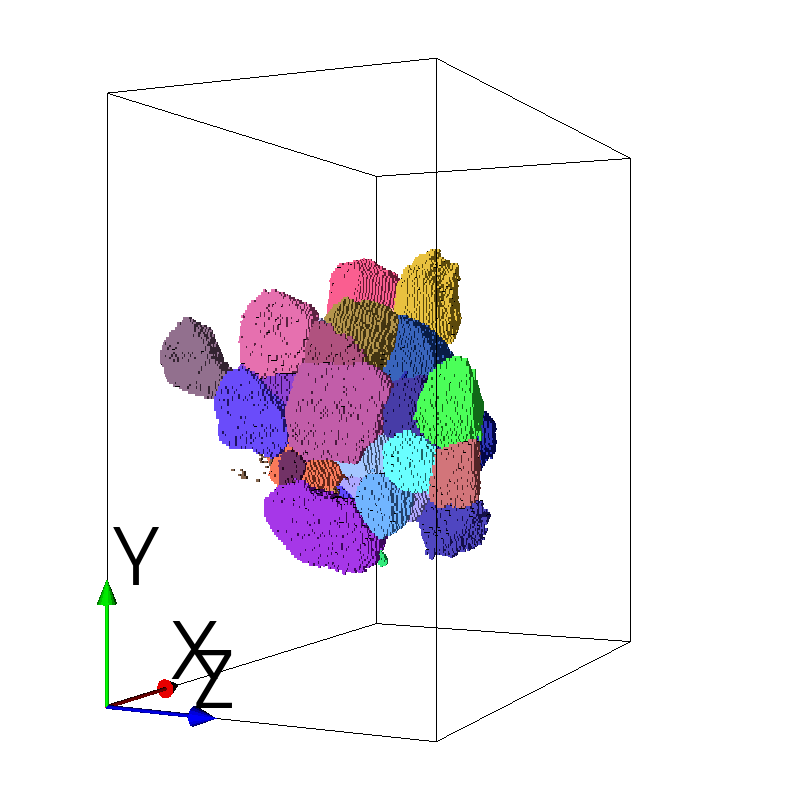

In [133]:
from pymicro.view.vtk_utils import *
from pymicro.view.scene3d import Scene3D
from IPython.display import Image

# show only grains imaged with TT
grains = show_grains(tt_grains)
box = box_3d(size=dims)
axes = axes_actor(50, axisLabels=('X', 'Y', 'Z'), fontSize=50)
s3d = Scene3D(display=False, ren_size=(800, 800), name='ts3_dct_top_tt_grains_3d')
s3d.add(grains)
s3d.add(box)
s3d.add(axes)
cam = setup_camera(size=dims)
cam.SetFocalPoint(0.5 * dims)
cam.SetViewUp(0, 1, 0)
cam.SetPosition(-2 * dims[0], 0.5 * dims[0], 2.5 * dims[2])
s3d.set_camera(cam)
im = s3d.get_frame()
Image(im)

Slip plane visibility in topotomography
--
We use grain 19 (11 in old numbering) to test the algorithms

In [272]:
exp = Experiment.load('ts3_experiment.txt')
Ti7Al = exp.get_sample().get_material()
lambda_keV = exp.get_source().max_energy
gid = 19
g = exp.get_sample().get_microstructure().get_grain(gid)

# define our lattice plane for topotomography
(h, k, l) = HklPlane.four_to_three_indices(1, 1, -2, 0)
hkl_tt = HklPlane(h, k, l, Ti7Al)
theta = hkl_tt.bragg_angle(lambda_keV, verbose=True)



Bragg angle for 110 at 38.0 keV is 6.4 deg



In [273]:
from pymicro.crystal.lattice import HklDirection, SlipSystem

# slip planes
p_basal = HklPlane(0, 0, 1, Ti7Al)  # basal plane
p_prism1 = HklPlane(0, 1, 0, lattice=Ti7Al)
p_prism2 = HklPlane(-1, 0, 0, lattice=Ti7Al)
p_prism3 = HklPlane(-1, 1, 0, lattice=Ti7Al)

# basal slip systems
bss1 = SlipSystem(p_basal, HklDirection(*HklDirection.four_to_three_indices(2, -1, -1, 0), lattice=Ti7Al))
bss2 = SlipSystem(p_basal, HklDirection(*HklDirection.four_to_three_indices(-1, 2, -1, 0), lattice=Ti7Al))
bss3 = SlipSystem(p_basal, HklDirection(*HklDirection.four_to_three_indices(-1, -1, 2, 0), lattice=Ti7Al))
basal_slip_systems = [bss1, bss2, bss3]

# prismatic slip systems
pss1 = SlipSystem(p_prism1, HklDirection(*HklDirection.four_to_three_indices(2, -1, -1, 0), lattice=Ti7Al))
pss2 = SlipSystem(p_prism2, HklDirection(*HklDirection.four_to_three_indices(-1, 2, -1, 0), lattice=Ti7Al))
pss3 = SlipSystem(p_prism3, HklDirection(*HklDirection.four_to_three_indices(-1, -1, 2, 0), lattice=Ti7Al))
prism_slip_systems = [pss1, pss2, pss3]

# list all basal and prismatic slip systems
ss_list = basal_slip_systems
ss_list.extend(prism_slip_systems)

# compute schmid factors
sf_list = g.orientation.compute_all_schmid_factors(ss_list, load_direction=[0., 0., 1], verbose=True)
ndx_max = np.argmax(sf_list)
print('max Schmid factor is %.3f for system %s' % (sf_list[ndx_max], ss_list[ndx_max]))

slip_planes = [ss_list[ndx_max].get_slip_plane()]

Slip system: (001)[100], Schmid factor is 0.134
Slip system: (001)[010], Schmid factor is 0.103
Slip system: (001)[110], Schmid factor is 0.237
Slip system: (010)[100], Schmid factor is 0.438
Slip system: (-100)[010], Schmid factor is 0.366
Slip system: (-110)[110], Schmid factor is 0.073
max Schmid factor is 0.438 for system (010)[100]


Edge-on configuration
--
In edge-on configuration, the slip plane normal is perpendicular to $K$ (and not $X$ even if when topotomo alignment is fulfilled we also have $X$, $K$ and $G$ in the same plane: the laboratory $(X, Z)$ plane).

The equation we must solve is $(R.n_t).K_u=0$ with $K_u=[\cos(\theta), 0, \sin(\theta)]$. /!\ Here we do not account for the base tilt as both left and right side of the equation would be equally affected.

This means solving $[n_{t}[0] \cos(\omega) - n_{t}[1] \sin(\omega)]\cos(\theta) + n_{t}[2]\sin(\theta)=0$.

The solution in $\omega$ is easily obtained by solving the trigonometric equation with $A=n_{t}[0] \cos(\theta)$, $B=-n_{t}[1] \cos(\theta)$ and $C=-n_{t}[2] \sin(\theta)$.



* plane (0, 1, -1, 0)
slip plane normal in sample frame: ns = [0.24072915 0.32678767 0.91392521] with norm 1.000
slip plane normal tilted by samrx and samry: nt = [0.16568267 0.14168215 0.97594847] with norm 1.000
the two omega values in degrees fulfilling the Edge-on configuration are (199.4, 79.6)
delta omega = 119.8
30.000000000000004


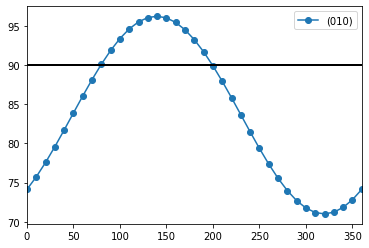

In [275]:
from matplotlib import pyplot as plt
%matplotlib inline

# compute edge-on configuration, diffraction vector is [cos(2theta), 0, sin(2theta)]
plt.figure()
Ku = np.array([cos(theta), 0, sin(theta)])
Xu = np.array([1, 0, 0])
omegas = np.linspace(0, 360, 37)
omegas_edge_on = []
for plane in slip_planes:
    (h, k, l) = plane.miller_indices()
    print('* plane (%d, %d, %d, %d)' % HklPlane.three_to_four_indices(h, k, l))
    ns = np.dot(gt, plane.normal())  # slip plane normal in sample local frame
    print('slip plane normal in sample frame: ns = %s with norm %.3f' % (ns, np.linalg.norm(ns)))
    nt = np.dot(S, ns)  # slip plane normal in tilted local frame
    print('slip plane normal tilted by samrx and samry: nt = %s with norm %.3f' % (nt, np.linalg.norm(nt)))
    A = nt[0] * cos(theta)
    B = -nt[1] * cos(theta)
    C = -nt[2] * sin(theta)
    omega_1, omega_2 = Orientation.solve_trig_equation(A, B, C, verbose=False)
    print('the two omega values in degrees fulfilling the Edge-on configuration are (%.1f, %.1f)' % (omega_1, omega_2))
    omegas_edge_on.append([omega_1, omega_2])
    print('delta omega = %.1f' % ((omega_1 - omega_2) % 360))
    print(180 / np.pi * np.arccos(np.dot(hkl_tt.normal(), plane.normal())))

    angles = []
    for omega in omegas:
        omegar = omega * pi / 180
        R = np.array([[np.cos(omegar), -np.sin(omegar), 0], [np.sin(omegar), np.cos(omegar), 0], [0, 0, 1]])
        nl = np.dot(R, nt)  # slip plane normal in turn table local frame
        angles.append(np.arccos(np.dot(nl/np.linalg.norm(nl), Ku)) * 180 / pi)
        #angle2 = np.arccos(np.dot(nl/np.linalg.norm(nl), Xu)) * 180 / pi
        #print('omega = %.1d -- nl = %s -- angle(nl, K) = %.1f' % (omega, str(nl), angle))
    plt.plot(omegas, angles, 'o-', label='(%d%d%d)' % (h, k, l))
plt.xlim(0, 360)
plt.axhline(y=90, color='k', linewidth=2)
plt.legend(numpoints=1)
plt.show()


In [44]:
from pymicro.view.vtk_utils import *

# display grain in TT condition
n = 14  # topograph 16 shows slip traces for grain 5
omegar = 4 * n * pi / 180
#omegar = omegas_edge_on[hkl_index][omega_index] * pi / 180
R = np.array([[cos(omegar), -sin(omegar), 0], [sin(omegar), cos(omegar), 0], [0, 0, 1]])  # turntable

hkl_index = 0
z_offsets = [0]
plane_origins = np.zeros((1, 3), dtype=float)
plane_origins[:, 2] = z_offsets[hkl_index]

# create the grain actor
#grain_with_planes = grain_3d(g, show_orientation=False, N=10)
grain_with_planes = grain_3d(g, [hkl_tt], show_normal=True, plane_opacity=1.0, show_orientation=False)
# , ss_list[ndx_max].get_slip_plane()
#apply_rotation_to_actor(grain_with_planes, np.dot(BT, np.dot(R, S)))

# set the grain color
collection = vtk.vtkPropCollection()
grain_with_planes.GetActors(collection)
collection.GetItemAsObject(0).GetProperty().SetColor(1, 0, 0)

# 3d scene
s3d_par = Scene3D(display=True, ren_size=(500, 500), name='tt_g%02d' % gid, background=(0., 0., 0.))
s3d_par.add(grain_with_planes)
axes = axes_actor(length=100, fontSize=60)
s3d_par.add(axes)
cam_par = setup_camera(grain_ids.shape)
cam_pos = - 100 * np.array([1, 0., 0.])
#cam_pos = - 100 * np.array([1, 0., np.tan(2 * theta)])  # look in the diffraction direction
print(cam_pos)
cam_par.SetPosition(cam_pos)
cam_par.SetFocalPoint(g.center)
cam_par.ParallelProjectionOn()
cam_par.Zoom(0.01)
s3d_par.set_camera(cam_par)
print(cam_par.GetPosition())

# save and display 3d image
im = s3d_par.get_frame()
#from IPython.display import Image
#Image(im)
with open('edge_on_g%02d_(%d%d%d%d)_vtk.png' % (gid, h, k, -(h + k), l), 'wb') as png:
    png.write(im)
print('done')

# Gs [-0.21534565  0.0892605   0.9724499 ]

5
(0.6784313725490196, 0.2549019607843137, 0.34901960784313724)
[-100.   -0.   -0.]
(-100.0, -0.0, -0.0)
done


In [ ]:
import os
from pymicro.file.file_utils import edf_read
from matplotlib import pyplot as plt, cm

fig = plt.figure(figsize=(15, 4))
plt.text(0.5, 1.1, 'Edge-on configuration for grain %02d and plane (%d%d%d%d)' % (gid, h, k, i, l), 
         ha='center', size=16)

plt.axis('off')
img_vtk_name = 'edge_on_g%02d_(%d%d%d%d)_vtk.png' % (gid, h, k, -(h + k), l)
#img_vtk = plt.imread(img_vtk_name)
ax1 = fig.add_subplot(1, 3, 1)
#ax1.imshow(img_vtk)
plt.axis('off')

n = 88
ax2 = fig.add_subplot(1, 3, 2)
tt0_stack_path = os.path.join(data_dir, 'grain%d_tt0_stack.edf' % gid)
tt0_stack = edf_read(tt0_stack_path)
print(tt0_stack.shape)
tt1_stack_path = os.path.join(data_dir, 'grain%d_tt1_stack.edf' % gid)
tt1_stack = edf_read(tt1_stack_path)
print(tt1_stack.shape)
ax2.matshow(tt0_stack[::-1, ::-1, n].T, cmap=cm.gray, vmin=1800, vmax=5800)
plt.axis('off')

plt.savefig('edge_on_g%02d_tt.pdf' % gid)
plt.show()

(601, 501, 90)


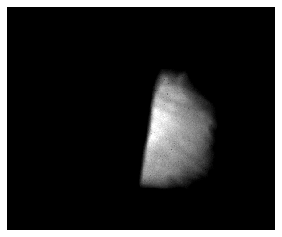

In [277]:
import os
from pymicro.file.file_utils import edf_read
from matplotlib import pyplot as plt, cm

tt1_stack_path = os.path.join(exp.get_sample().data_dir, 'grain%d_tt1_stack.edf' % 11)
tt1_stack = edf_read(tt1_stack_path)
print(tt1_stack.shape)
plt.matshow(tt1_stack[:, :, 23].T, cmap=cm.gray, vmin=1800, vmax=5000)
plt.axis('off')

plt.show()

In [278]:
for n in range(90):
    plt.imsave('ts3_dct_top_grain0019_tt1_%02d.png' % n, tt1_stack[:, :, n].T, cmap=cm.gray, vmin=1800, vmax=5000)

In [ ]:
dark = 0.5 * edf_read(os.path.join(data_dir, 'grain5_tt1_', 'darkend0000.edf'))
print(np.mean(dark))

# construct topographs
for n in range(89):
    topograph = np.zeros((501, 501))
    offset = 20 * n
    for i in range(20):
        index = offset + i
        im = edf_read(os.path.join(data_dir, 'grain5_tt1_', 'grain5_tt1_%04d.edf' % index)) - dark
        topograph += im
    plt.imsave('ts3_dct_top_grain0005_tt1_%02d.png' % n, topograph[::-1, ::-1].T, cmap=cm.gray)#, vmin=1800, vmax=5800)

plt.imshow(topograph[::-1, ::-1].T, cmap=cm.gray)
plt.title(r'topograph at $\omega=%d$ - $n=%d' % (4 * n, n))
plt.show()

### Forward Simulation

In [8]:
from pymicro.xray.experiment import Experiment
from pymicro.crystal.lattice import Symmetry, Lattice, HklPlane
from pymicro.xray.dct import DctForwardSimulation
from matplotlib import pyplot as plt
import numpy as np

exp = Experiment.load('ts3_experiment.txt')
Ti7Al = exp.get_sample().get_material()
exp.verbose = True

dct_fs = DctForwardSimulation()
dct_fs.set_experiment(exp)
dct_fs.verbose=False

# diffracting families
hkil_list = [(  0,   1,  -1,   0),
    (  0,   0,   0,   2),
    (  0,   1,  -1,   1),
    (  0,   1,  -1,   2),
    ( -1,   2,  -1,   0),
    (  0,   1,  -1,   3),
    (  0,   2,  -2,   0),
    ( -1,   2,  -1,   2),
    (  0,   2,  -2,   1),
    (  0,   0,   0,   4)]
dct_fs.set_diffracting_famillies(hkil_list)
#dct_fs.set_hkl_planes([HklPlane(0, 1, 0, lattice=Ti7Al)])
dct_fs.check = 8  # check this grain
dct_fs.setup(omega_step=0.5)

In [9]:
dct_fs.verbose = False
image_exp = dct_fs.grain_projection_exp(gid=1)

loading grain from file 4_grains/phase_01/grain_0001.mat
45 45


In [62]:
dct_fs.grain

Grain
 * id = 1
 * Crystal Orientation
orientation matrix = [[ 0.78096763  0.21367348  0.58688432]
 [ 0.31097032  0.68188156 -0.66206873]
 [-0.54165213  0.69955785  0.46608131]]
Euler angles (degrees) = ( 217.750,  62.220, 138.445)
Rodrigues vector = [-0.46488866 -0.38530667 -0.03321924]
Quaternion = [0.85570592 0.39780798 0.3297092  0.0284259 ]
 * position [-0.28949663  0.15308176  0.14593637]
 * has vtk mesh ? False

In [12]:
# build the list of experimental hkil for a better comparison
g = dct_fs.grain
hkl_planes_exp = []
for ndx in range(g.stack_exp.shape[0]):
    ii = int(g.ondet[int(g.included[ndx] - 1)] - 1)
    h, k, i, l = g.hklsp[:, ii]
    #print('{} - {:6.2f}'.format(g.hklsp[:, ii], g.om_exp[ndx]))
    hkl_planes_exp.append(HklPlane(h, k, l, lattice=Ti7Al))
dct_fs.set_hkl_planes(hkl_planes_exp)

# forward simulation
image_sim = dct_fs.grain_projection_simulation(gid=1)

forward simulation of grain 1
binarizing grain 1
shape of binary grain is (174, 186, 206)
simulating diffraction spot positions on the detector
building grain projections stack
90 90


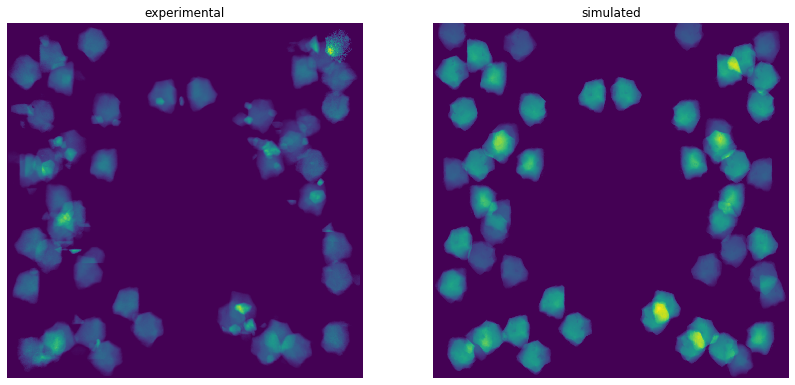

In [13]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image_exp.T)
plt.axis('off')
plt.title('experimental')
ax1 = fig.add_subplot(1, 2, 2)
ax1.imshow(image_sim.T)
plt.axis('off')
plt.title('simulated')
plt.show()

In [4]:
import h5py, os

f = h5py.File(os.path.join('id11/ts3_/ts3_dct_top_/5_reconstruction', 'phase_01_vol.mat'))
print(f['vol'].shape)
grain_ids = f['vol'][()].transpose(2, 1, 0)  # now we have [x, y, z] representation just like matlab
f.close()

(420, 715, 715)


In [38]:
import numpy as np
#index_omega = np.argmax(dct_fs.omegas > 45.4) - 1
index_omega = np.argmax(dct_fs.omegas > 43.7) - 1
print(index_omega)
print(len(dct_fs.reflections[index_omega]))
#dct_fs.reflections[index_omega] = dct_fs.reflections[index_omega][:3]
print(len(dct_fs.reflections[index_omega]))
dct_fs.reflections[index_omega]

87
3
3


[[4, (0, 0, 2)], [10, (0, 1, 2)], [20, (1, -1, -2)]]

In [36]:
full_proj = dct_fs.dct_projection(grain_ids, 43.7, include_direct_beam=True, att=5)

local center of mass (voxel): [513.84670101 251.18507773 111.52829912]
center of mass (voxel): [ 156.34670101 -106.31492227  -98.47170088]
center of mass (mm): [ 0.21888538 -0.14884089 -0.13786038]
local center of mass (voxel): [543.97214814 379.67034673 133.86286127]
center of mass (voxel): [186.47214814  22.17034673 -76.13713873]
center of mass (mm): [ 0.26106101  0.03103849 -0.10659199]
local center of mass (voxel): [134.82411438 206.85495379 218.79534785]
center of mass (voxel): [-222.67588562 -150.64504621    8.79534785]
center of mass (mm): [-0.31174624 -0.21090306  0.01231349]


In [30]:
from pymicro.file.file_utils import edf_read

# make composite experimental image on 0.5 degrees
im = np.zeros((2048, 2048), dtype=float)
for i in range(5):
    #im += edf_read('id11/ts3_/ts3_dct_top_/1_preprocessing/full%04d.edf' % (450 + i))  # grain 8
    im += edf_read('id11/ts3_/ts3_dct_top_/1_preprocessing/full%04d.edf' % (436 + i))  # grain 4

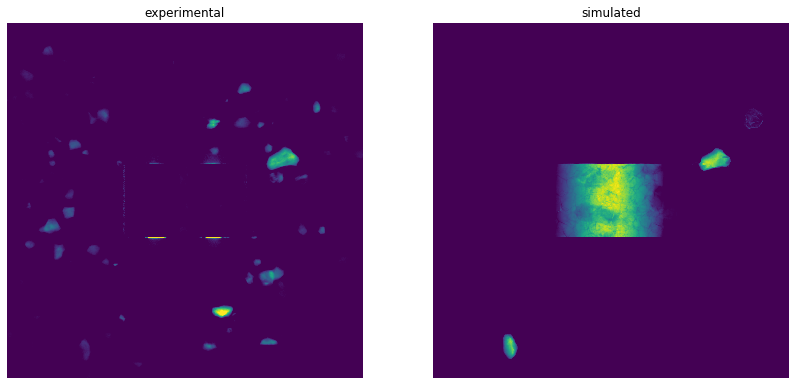

In [37]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(im.T, vmin=100, vmax=2000)
plt.axis('off')
plt.title('experimental')
ax1 = fig.add_subplot(1, 2, 2)
ax1.imshow(full_proj.T)
plt.axis('off')
plt.title('simulated')
plt.show()

In [3]:
import numpy as np
omega_step = 0.5
omegas = np.linspace(0.0, 360.0, num=int(360.0 / omega_step), endpoint=False)
print(omegas)
print(len(omegas))
reflections = []

for omega in omegas:
    reflections.append([])

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   81.5  8

In [57]:
for g in micro.grains:
    for plane in hkl_planes:
        (h, k, i, l) = HklPlane.three_to_four_indices(*plane.miller_indices())
        try:
            (w1, w2) = g.dct_omega_angles(plane, lambda_keV, verbose=False)
        except ValueError:
            print('plane {} does not fulfil the Bragg condition for grain {:d}'.format((h, k, i, l), g.id))
            continue
        # add angles for Friedel pairs
        w3 = (w1 + 180.) % 360
        w4 = (w2 + 180.) % 360
        if g.id == 5:
            # print('grain %d, angles for plane %d%d%d: w1=%.3f and w2=%.3f | delta=%.1f' % (g.id, h, k, l, w1, w2, w1-w2))
            print('(%3d, %3d, %3d, %3d) -- %6.2f & %6.2f' % (h, k, i, l, w1, w2))
        reflections[int(w1 / omega_step)].append([g.id, (h, k, l)])
        reflections[int(w2 / omega_step)].append([g.id, (h, k, l)])
        reflections[int(w3 / omega_step)].append([g.id, (-h, -k, -l)])
        reflections[int(w4 / omega_step)].append([g.id, (-h, -k, -l)])


(  0,   1,  -1,   0) -- 207.29 &  45.51
(  0,  -1,   1,   0) --  27.29 & 225.51
( -1,   0,   1,   0) --  56.01 & 243.45
(  1,   0,  -1,   0) -- 236.01 &  63.45
(  1,  -1,   0,   0) -- 248.55 &  80.12
( -1,   1,   0,   0) --  68.55 & 260.12
(  0,   0,   0,   2) -- 327.23 & 155.34
(  0,   0,   0,  -2) -- 147.23 & 335.34
(  0,   1,  -1,   1) -- 276.42 & 114.97
(  0,  -1,   1,  -1) --  96.42 & 294.97
( -1,   0,   1,   1) --  27.65 & 216.04
(  1,   0,  -1,  -1) -- 207.65 &  36.04
(  1,  -1,   0,   1) -- 283.50 & 113.88
( -1,   1,   0,  -1) -- 103.50 & 293.88
(  0,   1,  -1,  -1) -- 172.94 &   4.96
(  0,  -1,   1,   1) -- 352.94 & 184.96
( -1,   0,   1,  -1) --  84.03 & 272.60
(  1,   0,  -1,   1) -- 264.03 &  92.60
(  1,  -1,   0,  -1) -- 202.80 &  35.83
( -1,   1,   0,   1) --  22.80 & 215.83
(  0,   1,  -1,   2) -- 300.55 & 137.16
(  0,  -1,   1,  -2) -- 120.55 & 317.16
( -1,   0,   1,   2) --   8.08 & 198.95
(  1,   0,  -1,  -2) -- 188.08 &  18.95
(  1,  -1,   0,   2) -- 298.16 & 129.95


### stuff to delete

In [10]:
import h5py

f = h5py.File('../T5/id11/t5_/t5_dct_bot_/5_reconstruction/volume_dilated.mat')
data_t5 = f['grains'][()].transpose(2, 1, 0)  # to have [x, y, z] representation
#grain_ids = f['grains'][1:392, 198:527, 154:566].transpose(2, 1, 0)  # to have [x, y, z] representation
print(np.unique(data_t5))  # check that 0 is not present
f.close()

from pymicro.file.file_utils import HST_write
HST_write(data_t5[:, :, :], 'ts5_dct_bot_.raw')

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165]
opening ts5_dct_bot_.raw for writing in mode w
volume size is 676x676x414
data type is int16
writing .info file
done with writing


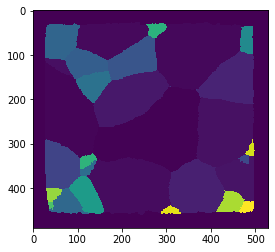

In [15]:
plt.imshow(data_t5[100:630, 100:590, 207].T)
plt.show()

In [61]:
family = HklPlane.get_family((0, -2, 2, 1), lattice=Ti7Al, crystal_structure=Symmetry.hexagonal)
for hkil in family:
    print(HklPlane.three_to_four_indices(*hkil.miller_indices()))

(0, 2, -2, -1)
(2, 0, -2, 1)
(-2, 2, 0, 1)
(0, 2, -2, 1)
(-2, 0, 2, 1)
(2, -2, 0, 1)


In [64]:
tt_id = 67
print('**looking at grain %d' % tt_id)
grain = micro.get_grain(tt_id)
#hkl_str = tt_hkl[tt_grain_ids.index(tt_id)]
#hkl_str = [( 0,  -2,   2,   1)]
#family = HklPlane.get_family(hkl_str, lattice=Ti7Al, crystal_structure=Symmetry.hexagonal)
family = HklPlane.get_family((0, -2, 1), lattice=Ti7Al, crystal_structure=Symmetry.hexagonal)
# verify topotomo alignment
for hkl in family:
    h, k, l = hkl.miller_indices()
    i = -(h + k)
    #print('* (%d%d%d%d) reflection' % (h, k, i, l))
    (ut, lt) = np.degrees(grain.orientation.topotomo_tilts(hkl, verbose=True))
    if abs(ut) < 20 and abs(lt) < 15:
        #samrx.append(lt - 0.3)
        #samry.append(ut + 1.52)
        #hkl_difs.append(HklPlane(h, k, l, lattice=Ti7Al))
        print('aligned reflection will be (%d%d%d%d)' % (h, k, i, l))

**looking at grain 67
up tilt (samry) should be -36.422
low tilt (samrx) should be -84.230
up tilt (samry) should be -7.134
low tilt (samrx) should be 28.508
up tilt (samry) should be -56.375
low tilt (samrx) should be -18.031
up tilt (samry) should be 66.829
low tilt (samrx) should be 58.891
up tilt (samry) should be -41.742
low tilt (samrx) should be 38.027
up tilt (samry) should be -24.908
low tilt (samrx) should be -26.633


In [62]:
#tt_ids = [11, 64, 31, 5, 54, 39] # for bot most likely
tt_ids = [61, 67]
micro = Microstructure.from_dct(data_root='id11/ts3_/ts3_dct_top_/', grain_ids=tt_ids)

loaded volume with shape: 675 x 675 x 420
loading grain 61
adding block 0 to mesh for grain 61
loading grain 67
adding block 1 to mesh for grain 67


In [63]:
print(micro.get_grain(67))

Grain
 * id = 67
 * Crystal Orientation
orientation matrix = [[ 0.53882613  0.10032985  0.83642114]
 [-0.27694237  0.95879273  0.06339899]
 [-0.79559369 -0.26580149  0.54440816]]
Euler angles (degrees) = ( 288.474,  57.016,  85.665)
Rodrigues vector = [ 0.10821747 -0.53648926  0.12402001]
 * position [[-0.32999782]
 [-0.01017791]
 [ 0.24220743]]
 * has vtk mesh ? True



In [31]:
lambda_keV = 38
g = micro.grains[76]
(h, k, l) = HklPlane.four_to_three_indices(1, 1, -2, 0)
print(h, k, l)
hkl_dif = HklPlane(h, k, l, Ti7Al)
theta = hkl_dif.bragg_angle(lambda_keV)

print('grain orientation (rodrigues): %s' % str(g.orientation.rod))
gt = g.orientation_matrix().transpose()
Gs = np.dot(gt, hkl_dif.scattering_vector())
print('scattering vector: %s with norm %.3f' % (str(Gs), np.linalg.norm(Gs)))
(h, k, l) = hkl_dif.miller_indices()
print('%d%d%d lattice spacing is %.3f nm' % (h, k, l, 1 / hkl_dif.interplanar_spacing()))


(1, 1, 0)
grain orientation (rodrigues): [ 0.65159936 -0.46612776 -0.07389782]
scattering vector: [0.8402331  1.25981274 6.65345996] with norm 6.824
110 lattice spacing is 6.824 nm


In [32]:
# verify topotomo alignment
(ut, lt) = g.orientation.topotomo_tilts(hkl_dif, verbose=True)
from math import cos, sin, pi
U = np.array([[cos(ut), 0, sin(ut)], [0, 1, 0], [-sin(ut), 0, cos(ut)]])
L = np.array([[1, 0, 0], [0, cos(lt), -sin(lt)], [0, sin(lt), cos(lt)]])
S = np.dot(L, U)
print('tilt matrix T:')
print(S)
T = np.array([[cos(-theta), 0, sin(-theta)], [0, 1, 0], [-sin(-theta), 0, cos(-theta)]])  # base tilt
Gt = np.dot(S, Gs)
Gl = np.dot(T, Gt)
print('scattering vector tilted by samrx and samry: Gt = %s with norm %.3f' % (Gt, np.linalg.norm(Gt)))
print('scattering vector further tilted bt base tilt Gl = %s' % Gl)

up tilt (samry) should be -7.198
low tilt (samrx) should be 10.639
tilt matrix T:
[[ 0.99212016  0.         -0.12529003]
 [-0.02313174  0.98280894 -0.18317074]
 [ 0.12313616  0.18462556  0.97506456]]
scattering vector tilted by samrx and samry: Gt = [-1.11022302e-16  0.00000000e+00  6.82360969e+00] with norm 6.824
scattering vector further tilted bt base tilt Gl = [-0.75956754  0.          6.78120243]


* plane (0-10)
slip plane normal in sample frame: ns = [ 0.27903631 -0.47788746 -0.83292395] with norm 1.000
slip plane normal tilted by samrx and samry: nt = [ 0.38119462 -0.32355937 -0.8660254 ] with norm 1.000
A=0.379, B=0.322, C=0.096, Delta=1.0
the two omega values in degrees fulfilling the Edge-on configuration are (321.5, 119.1)


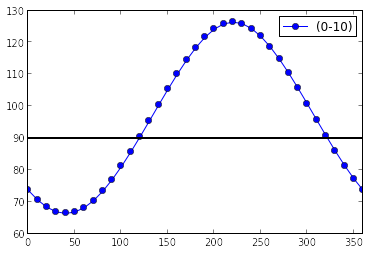

In [33]:
# compute edge-on configuration, diffraction vector is [cos(2theta), 0, sin(2theta)]
p_active = ss_prism1.get_slip_plane()
plt.figure()
Ku = np.array([cos(theta), 0, sin(theta)])
Xu = np.array([1, 0, 0])
omegas = np.linspace(0, 360, 37)
omegas_edge_on = []
for plane in [p_active]:
    (h, k, l) = plane.miller_indices()
    print('* plane (%d%d%d)' % (h, k, l))
    ns = np.dot(gt, plane.normal())  # slip plane normal in sample local frame
    print('slip plane normal in sample frame: ns = %s with norm %.3f' % (ns, np.linalg.norm(ns)))
    nt = np.dot(S, ns)  # slip plane normal in tilted local frame
    print('slip plane normal tilted by samrx and samry: nt = %s with norm %.3f' % (nt, np.linalg.norm(nt)))
    A = nt[0] * cos(theta)
    B = -nt[1] * cos(theta)
    C = -nt[2] * sin(theta)
    omega_1, omega_2 = Orientation.solve_trig_equation(A, B, C, verbose=True)
    print('the two omega values in degrees fulfilling the Edge-on configuration are (%.1f, %.1f)' % (omega_1, omega_2))
    omegas_edge_on.append([omega_1, omega_2])

    angles = []
    for omega in omegas:
        omegar = omega * pi / 180
        R = np.array([[np.cos(omegar), -np.sin(omegar), 0], [np.sin(omegar), np.cos(omegar), 0], [0, 0, 1]])
        nl = np.dot(R, nt)  # slip plane normal in turn table local frame
        angles.append(np.arccos(np.dot(nl/np.linalg.norm(nl), Ku)) * 180 / pi)
    plt.plot(omegas, angles, 'o-', label='(%d%d%d)' % (h, k, l))
plt.xlim(0, 360)
plt.axhline(y=90, color='k', linewidth=2)
plt.legend(numpoints=1)
plt.show()


In [ ]:
# try plotting the grain in 3d

# recompute the rotation matrix for the chosen angle
n = int(round(omegas_edge_on[hkl_index][omega_index] / 4))
print('recomputing the rotation matrix for the chosen angle: %g deg (n=%d)' % (4 * n, n))
omegar = 4 * n * pi / 180
omegar = omegas_edge_on[hkl_index][omega_index] * pi / 180
R = np.array([[cos(omegar), -sin(omegar), 0], [sin(omegar), cos(omegar), 0], [0, 0, 1]])  # turntable

plane_origins = np.zeros((len(z_offsets[hkl_index]), 3), dtype=float)
plane_origins[:, 2] = z_offsets[hkl_index]

# create the grain actor
grain_with_planes = grain_3d(grain, len(z_offsets[hkl_index]) * [slip_planes[hkl_index]], plane_origins=plane_origins, 
                             show_normal=False, plane_opacity=1.0, show_orientation=False)
apply_rotation_to_actor(grain_with_planes, np.dot(T, np.dot(R, S)))
apply_translation_to_actor(grain_with_planes, grain.position)

# 3d scene
s3d_par = Scene3D(display=True, ren_size=(340, 340), name='tt_anim_g%02d' % gid)
s3d_par.add(grain_with_planes)
#axes = axes_actor(length=np.mean(data.shape), fontSize=60)
#s3d_par.add(axes)
#bb = box_3d(size=data.shape)
#s3d_par.add(bb)
#s3d_par.add(K_arrow)
cam_par = setup_camera(data.shape)
cam_par.SetPosition(grain.position - 100*np.array([1, 0., 0.98*np.tan(2*theta)]))
cam_par.SetFocalPoint(grain.position)
cam_par.ParallelProjectionOn()
cam_par.Zoom(0.035)
s3d_par.set_camera(cam_par)
print(cam_par.GetPosition())

# save and display 3d image
from IPython.display import Image
im = s3d_par.get_frame()
Image(im)
with open('edge_on_g%02d_(%d%d%d)_omega%d_vtk.png' % (gid, h, k, l, (omega_index + 1)), 'wb') as png:
    png.write(im)
print('done')